# Data Science and Programming
# Week 5

# Table of Contents

* [Introduction](#intro)
 - [Problem](#problem)
 - [Importing libraries and data](#imports)
* [Preprocessing and Preparing](#preprocessing)
 - [Cleaning the `Daily Total Rainfall` feature](#cleaning)
 - [Checkpoint 1](#Checkpoint-1)
 - [Changing the data type of `Year`](#Changing-the-data-type-of-Year)
 - [Displaying the feature names, data types and size of the data set](#info)
* [Exploring the data (1): using `catplot`](#catplot)
 - [Box plots](#box)
 - [Strip plots](#strip)
 - [Violin plots](#violin)
 - [Checkpoint 2](#Checkpoint-2)
* [Exploring the data (2): using `displot`](#displot)
   - [Histograms](#hist)
   - [Kernel density estimations (KDE)](#kde)
   - [Checkpoint 3](#Checkpoint-3)
* [Communicating the results](#communicating)
 - [Checkpoint 4](#Checkpoint-4)


<a id='intro'></a>
# Introduction 
This activity uses the *Seaborn* library in Python to create 1-dimensional charts for data: these are charts that feature a single numerical variable. Some of these, such as box plots and histograms, you should have met before; other charts, such as swarm plots and violin plots, might be new to you. You will meet 2-dimensional charts, such as scatter plots, in the next activity. More information about Seaborn can be seen at: https://seaborn.pydata.org/

The activity uses the data from the Edexcel large data set which features weather data for 1987 and 2015 from eight weather stations. The activity use the data from the five UK weather stations.

<a id='problem'></a>
## Problem
***How does the weather differ at the five different UK stations?***

To answer this question you could produce 1-dimensional charts to explore and represent these differences.

<a id='imports'></a>
## Importing the libraries and data

> Run the code box below to import the libraries.

In [1]:
# import pandas for data analysis
import pandas as pd 

# import seaborn for visualisations
import seaborn as sns

> Run the code in the box below to import the csv file as a data set. The output of the code will appear below it.

In [2]:
# import the csv file to a data set called weather_data
weather_data = pd.read_csv('all-stations-uk.csv')

# display the data to verify it has imported
weather_data

,Date,Daily Mean Temperature,Daily Total Rainfall,Daily Total Sunshine,Daily Mean Windspeed,Daily Mean Windspeed (Beaufort),Daily Maximum Gust,Daily Maximum Relative Humidity,Daily Mean Total Cloud,Daily Mean Visibility,Daily Mean Pressure,Daily Mean Wind Direction,Mean Cardinal Direction,Daily Max Gust Direction,Max Cardinal Direction,Station,Year
0,01/05/1987,10.7,3.1,NaN,NaN,NaN,NaN,100,7,2000,1018,360,N,20.0,NNE,Camborne,1987
1,02/05/1987,8.9,0.1,NaN,NaN,NaN,NaN,91,3,3200,1020,320,NW,330.0,NNW,Camborne,1987
2,03/05/1987,8.1,0,NaN,NaN,NaN,NaN,77,5,3600,1029,350,N,350.0,N,Camborne,1987
3,04/05/1987,8.2,0,NaN,NaN,NaN,NaN,83,5,4100,1036,350,N,350.0,N,Camborne,1987
4,05/05/1987,9.8,0,NaN,NaN,NaN,NaN,86,5,2700,1036,10,N,10.0,N,Camborne,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,27/10/2015,8.1,1,0.0,10.0,Light,20.0,100,7,300,1012,110,ESE,100.0,E,Leuchars,2015
1836,28/10/2015,11.7,9,0.0,11.0,Moderate,22.0,100,8,200,1006,110,ESE,120.0,ESE,Leuchars,2015
1837,29/10/2015,9.5,1.8,1.4,7.0,Light,22.0,100,5,1700,1006,140,SE,130.0,SE,Leuchars,2015
1838,30/10/2015,9.9,2.6,0.2,3.0,Light,11.0,100,8,1100,1013,280,W,150.0,SSE,Leuchars,2015


<a id='preprocessing'></a>
# Pre-processing the data
<a id='cleaning'></a>
## Cleaning the `Daily Total Rainfall` feature
In the extension to the activity in lesson 1 there was some code that created a new feature `Rainfall`:  this is a copy of `Daily Total Rainfall` with the values of *tr* replaced with 0.025.

> Run the code below to pre-process the data.

In [3]:
# create a new column called Rainfall which is a copy of the Daily Total Rainfall column
weather_data['Rainfall'] = weather_data['Daily Total Rainfall']

# replace any instances of 'tr' with 0.025 and change the type to float
weather_data['Rainfall'] = weather_data['Rainfall'].replace({'tr': 0.025}).astype('float')

weather_data

,Date,Daily Mean Temperature,Daily Total Rainfall,Daily Total Sunshine,Daily Mean Windspeed,Daily Mean Windspeed (Beaufort),Daily Maximum Gust,Daily Maximum Relative Humidity,Daily Mean Total Cloud,Daily Mean Visibility,Daily Mean Pressure,Daily Mean Wind Direction,Mean Cardinal Direction,Daily Max Gust Direction,Max Cardinal Direction,Station,Year,Rainfall
0,01/05/1987,10.7,3.1,NaN,NaN,NaN,NaN,100,7,2000,1018,360,N,20.0,NNE,Camborne,1987,3.1
1,02/05/1987,8.9,0.1,NaN,NaN,NaN,NaN,91,3,3200,1020,320,NW,330.0,NNW,Camborne,1987,0.1
2,03/05/1987,8.1,0,NaN,NaN,NaN,NaN,77,5,3600,1029,350,N,350.0,N,Camborne,1987,0.0
3,04/05/1987,8.2,0,NaN,NaN,NaN,NaN,83,5,4100,1036,350,N,350.0,N,Camborne,1987,0.0
4,05/05/1987,9.8,0,NaN,NaN,NaN,NaN,86,5,2700,1036,10,N,10.0,N,Camborne,1987,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,27/10/2015,8.1,1,0.0,10.0,Light,20.0,100,7,300,1012,110,ESE,100.0,E,Leuchars,2015,1.0
1836,28/10/2015,11.7,9,0.0,11.0,Moderate,22.0,100,8,200,1006,110,ESE,120.0,ESE,Leuchars,2015,9.0
1837,29/10/2015,9.5,1.8,1.4,7.0,Light,22.0,100,5,1700,1006,140,SE,130.0,SE,Leuchars,2015,1.8
1838,30/10/2015,9.9,2.6,0.2,3.0,Light,11.0,100,8,1100,1013,280,W,150.0,SSE,Leuchars,2015,2.6


<a id='info'></a>
## Displaying the feature names, data types and size of the data set

> Run the code now and check the result

In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             1840 non-null   object 
 1   Daily Mean Temperature           1840 non-null   float64
 2   Daily Total Rainfall             1840 non-null   object 
 3   Daily Total Sunshine             1759 non-null   float64
 4   Daily Mean Windspeed             1757 non-null   float64
 5   Daily Mean Windspeed (Beaufort)  1757 non-null   object 
 6   Daily Maximum Gust               1684 non-null   float64
 7   Daily Maximum Relative Humidity  1840 non-null   int64  
 8   Daily Mean Total Cloud           1840 non-null   int64  
 9   Daily Mean Visibility            1840 non-null   int64  
 10  Daily Mean Pressure              1840 non-null   int64  
 11  Daily Mean Wind Direction        1840 non-null   int64  
 12  Mean Cardinal Direct

In this activity you will explore 1-dimensional charts, such as box plots or histograms, for representing numerical variables. It is important to know which of the features of your data set are numerical. 

## Checkpoint 1
> * Which of the features of data set are numerical variables?
> * Are there any numerical features for which a 1-dimensional chart, such as a box plot, could be misleading?

## Changing the data type of `Year`

The original data type of `Year` is numeric, but because there are only two values (1987 and 2015) it makes sense to think of it as a categorical feature. Changing the data type to `category` helps pandas and Seaborn know how to handle this column.

> Run the code below to change the data type of `Year`

In [5]:
# change the data type of a feature
weather_data['Year'] = weather_data['Year'].astype('category')

weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Date                             1840 non-null   object  
 1   Daily Mean Temperature           1840 non-null   float64 
 2   Daily Total Rainfall             1840 non-null   object  
 3   Daily Total Sunshine             1759 non-null   float64 
 4   Daily Mean Windspeed             1757 non-null   float64 
 5   Daily Mean Windspeed (Beaufort)  1757 non-null   object  
 6   Daily Maximum Gust               1684 non-null   float64 
 7   Daily Maximum Relative Humidity  1840 non-null   int64   
 8   Daily Mean Total Cloud           1840 non-null   int64   
 9   Daily Mean Visibility            1840 non-null   int64   
 10  Daily Mean Pressure              1840 non-null   int64   
 11  Daily Mean Wind Direction        1840 non-null   int64   
 12  Mean C

<a id='catplot'></a>
# Exploring the data (1): using `catplot`
Seaborn uses two main families of plots for 1-dimensional charts: `catplot` (for comparing categories) and `displot` (for comparing distributions). You will meet both in this activity.

In Seaborn `catplot` creates charts of a single variable with the option of grouping this by additional categories. You can use it to create box plots, strip plots and violin plots.

For more information see: https://seaborn.pydata.org/generated/seaborn.catplot.html


<a id='box'></a>
## Box plots
You have already seen how to use `catplot` to create a box plot.

> Run the code below to generate a box plot for Daily Mean Temperature

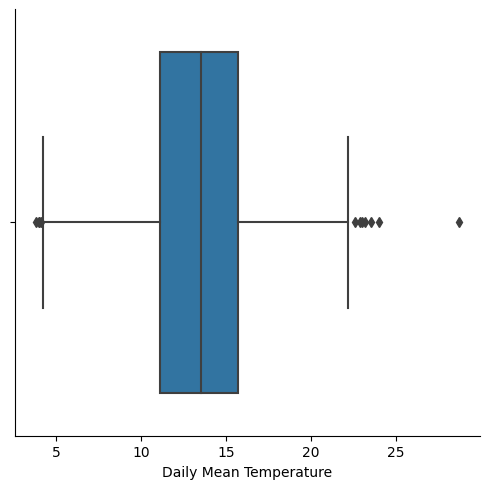

In [6]:
# creating a box plot - define the data and the x-variable
sns.catplot(data=weather_data, kind='box', x='Daily Mean Temperature');

You can add an additional categorical feature as a y-variable.

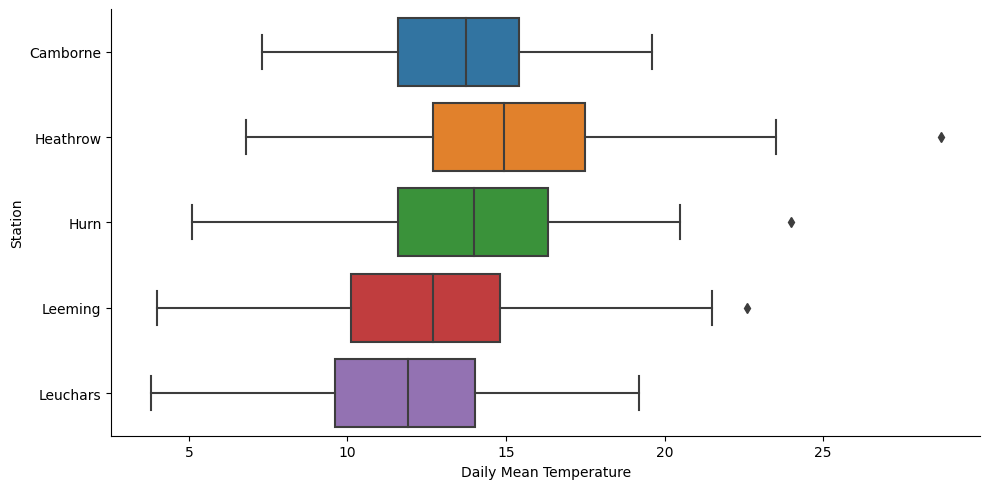

In [7]:
# create a box plot with a category on the y-axis, NB aspect=2 gives a plot twice as wide as it is high
sns.catplot(data=weather_data, kind='box', x='Daily Mean Temperature', y='Station', aspect=2);

You can also add a colour (or `hue`) to further categorise by another feature.

> Run the code below

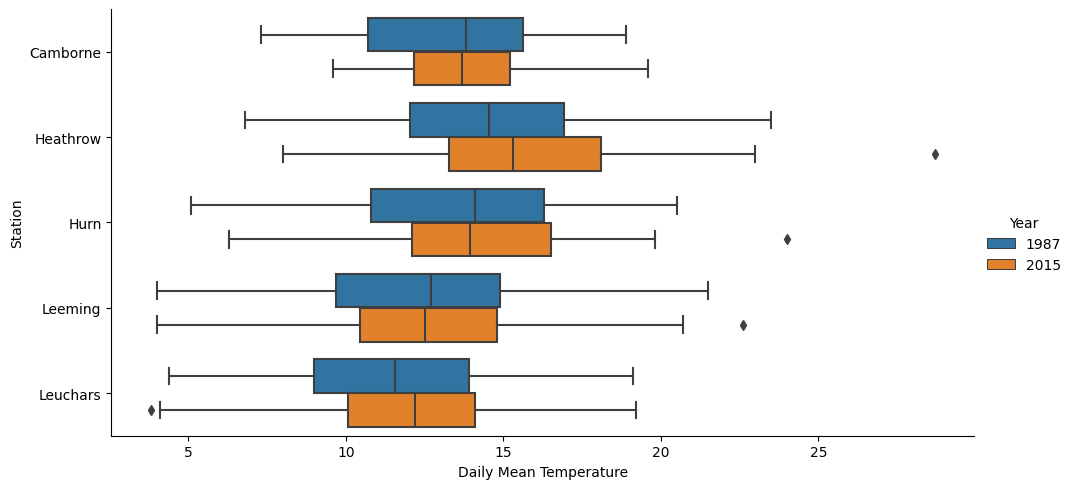

In [8]:
# create a box plot with a category on the y-axis, colour-coded by another category
sns.catplot(data=weather_data, kind='box', x='Daily Mean Temperature', y='Station', hue='Year', aspect=2);

> * In the box below copy and change the code to create box plots for another numerical feature categorised by station 
> * Explore changing the `aspect` parameter

In [ ]:
# create a box plot with a category on the y-axis


<a id='strip'></a>
## Strip plots
An alternative to a box plot is a *strip plot* which places a point for every item in the data set on a numerical scale.

> Run the code below 

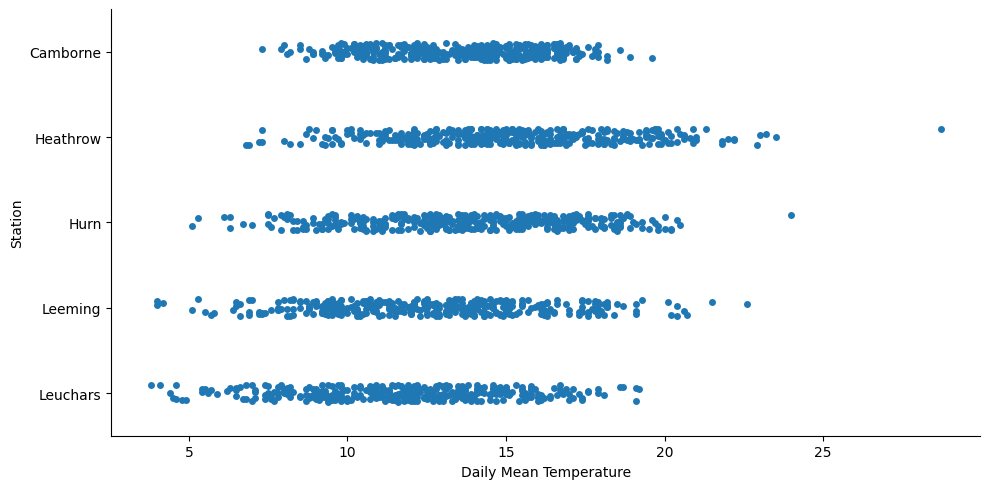

In [9]:
# create a strip plot with a category on the y-axis
sns.catplot(data=weather_data, kind='strip', x='Daily Mean Temperature', y='Station', aspect=2);

You can also add a colour (or `hue`) to further categorise by another feature.

> Run the code below

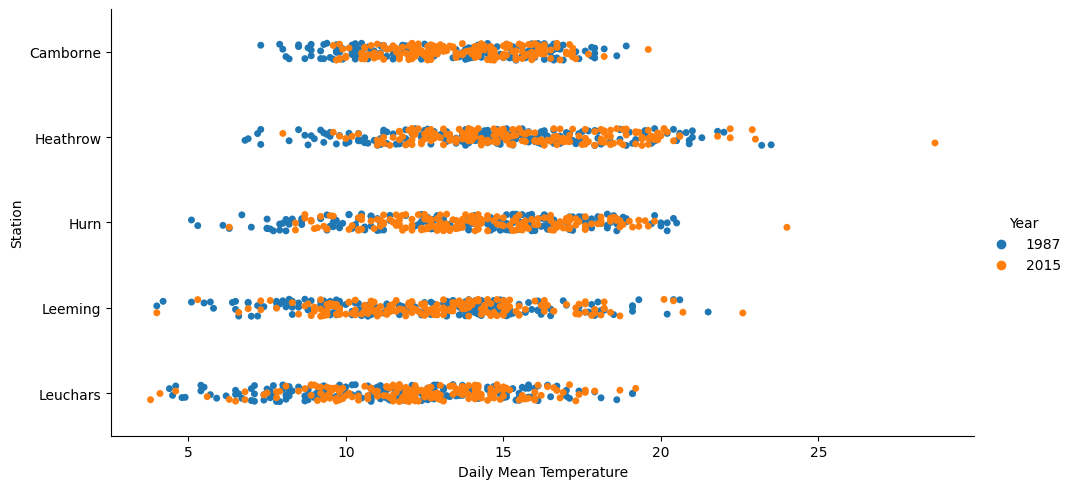

In [10]:
# create a strip plot with a category on the y-axis, colour-coded by another category
sns.catplot(data=weather_data, kind='strip', x='Daily Mean Temperature', y='Station', hue='Year', aspect=2,);

> * In the box below copy and change the code to create strip plots for another numerical feature categorised by station and year
> * Explore changing the `hue` parameter: e.g. `x='Daily Mean Windspeed', y='Station', hue='Mean Cardinal Direction',`

In [ ]:
# create a strip plot with a category on the y-axis, colour-coded by another category


<a id='violin'></a>
## Violin plots
A *violin plot* shows an estimate of the shape of the distribution, this is similar to a kernel density estimation that you will meet later in this activity.

One of the advantages of a violin plot is that the distributions for two alternatives can be compared next to each other using a *split violin plot*. A split violin plot **must** have a numerical feature for `x`, a categorical feature for `y` and a *binary* feature for `hue`. A binary feature is one that takes exactly two different values: e.g. yes/no.

> Run the code below

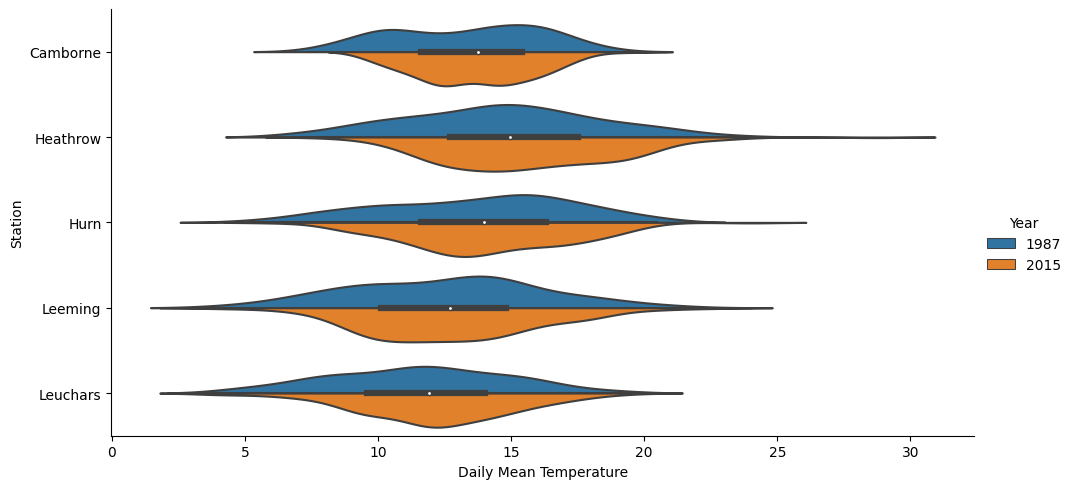

In [11]:
# generate a split violin plot with a category for y and a binary for hue
sns.catplot(data=weather_data, kind='violin', x='Daily Mean Temperature', y='Station', hue='Year',  split=True,  aspect=2);

> * In the box below copy and change the code to create violin plots for another numerical feature categorised by station and year
> * Explore removing `split=True,`

In [ ]:
# generate a split violin plot with a category for y and a binary for hue

## Checkpoint 2

> * Give at least one difference between the weather for the different stations/years that can be observed from the box plots.
> * Give at least one difference between the weather for the different stations/years that can be observed from the strip plots.
> * Give at least one difference between the weather for the different stations/years that can be observed from the violin plots.
> * Which of these three charts do you find the most useful for comparing the stations/years? Give a reason for your answer.

<a id='displot'></a>
# Exploring the data (2): Creating charts using `displot`
In Seaborn `displot` creates charts to show the distribution of a single variable with the option of grouping this by additional categories. You can use it to create histograms and kernel density estimations (KDEs).

For more information see: https://seaborn.pydata.org/generated/seaborn.displot.html

<a id='hist'></a>
## Histograms

The default is a histogram. Note that Seaborn uses the form of a histogram with equal interval widths and frequency on the vertical axis.

> Run the code below to plot a histogram

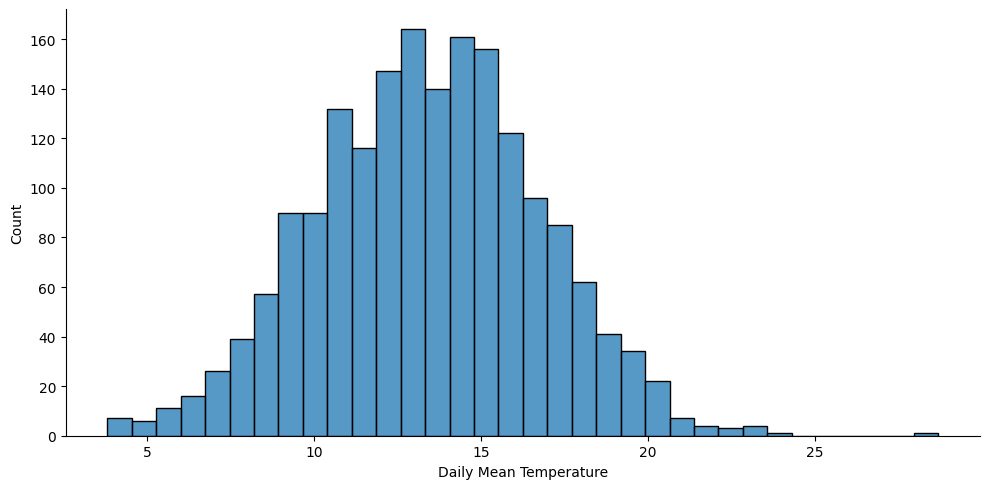

In [12]:
# plot a histogram
sns.displot(data=weather_data, x='Daily Mean Temperature', aspect=2);

You can split your data by drawing histograms for the separate stations. The `col` parameter draws a separate histogram for each one.

> Run the code below

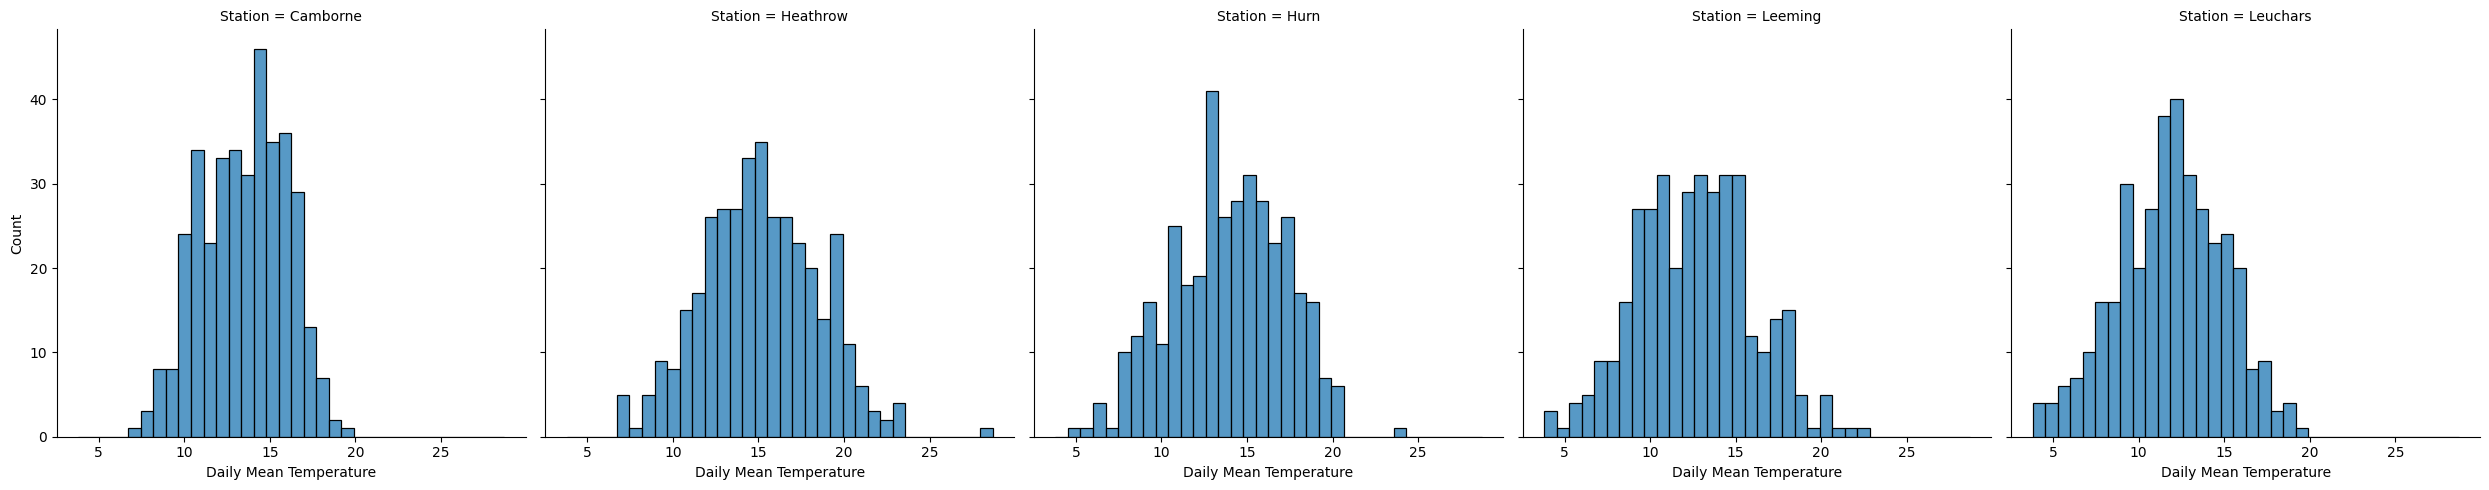

In [13]:
# plot histograms split by a category over columns
sns.displot(data=weather_data, x='Daily Mean Temperature', col='Station');

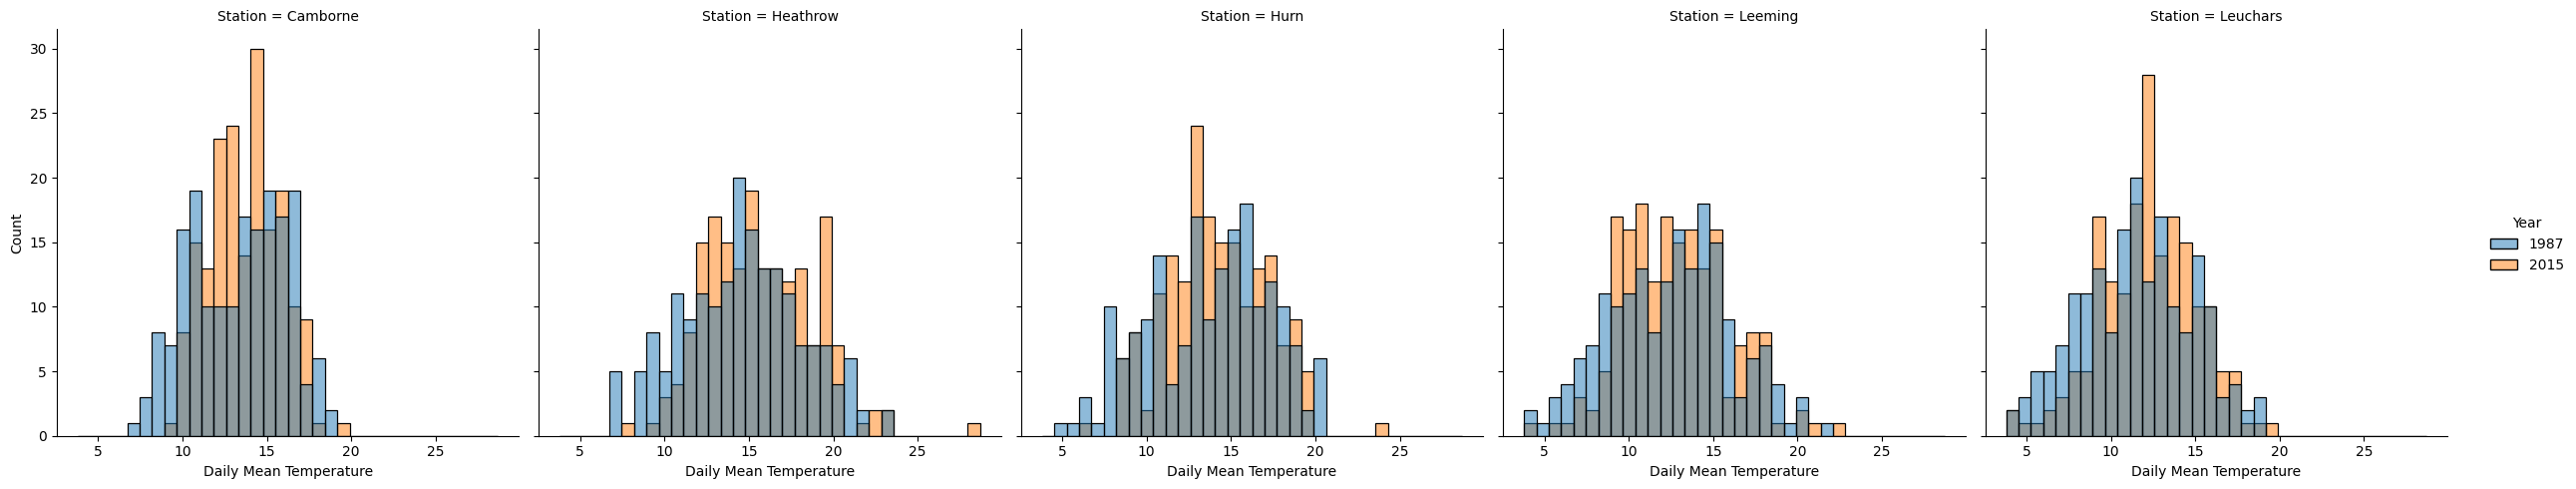

In [14]:
# plot histograms split by a category over columns
sns.displot(data=weather_data, x='Daily Mean Temperature', col='Station', hue='Year');

> * In the box below copy and change the code to create histograms for another numerical feature categorised by station 
> * Explore adding `hue='Year'`
> * Explore changing the order of `col` and `hue`: e.g. `col='Year', hue='Station'`

In [ ]:
# plot histograms split by a category over columns

<a id='kde'></a>
## Kernel density estimations (KDE)
A *kernel density estimation* (KDE) plot smoothes out the histogram to give an estimate of what the continuous distribution looks like.

> Run the code below to create a kde

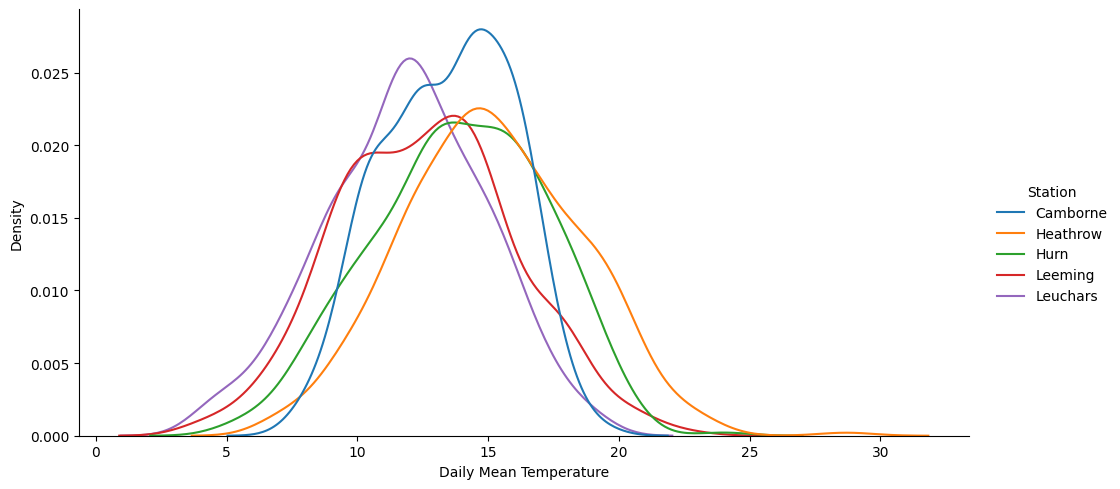

In [15]:
# kind='kde' estimates the shape of a continuous distribution, categorised using hue
sns.displot(data=weather_data, kind='kde', x='Daily Mean Temperature', hue='Station', aspect=2 );

As with the histogram you can further split the data into columns using `col`.

> Run the code below to create a kde split into columns

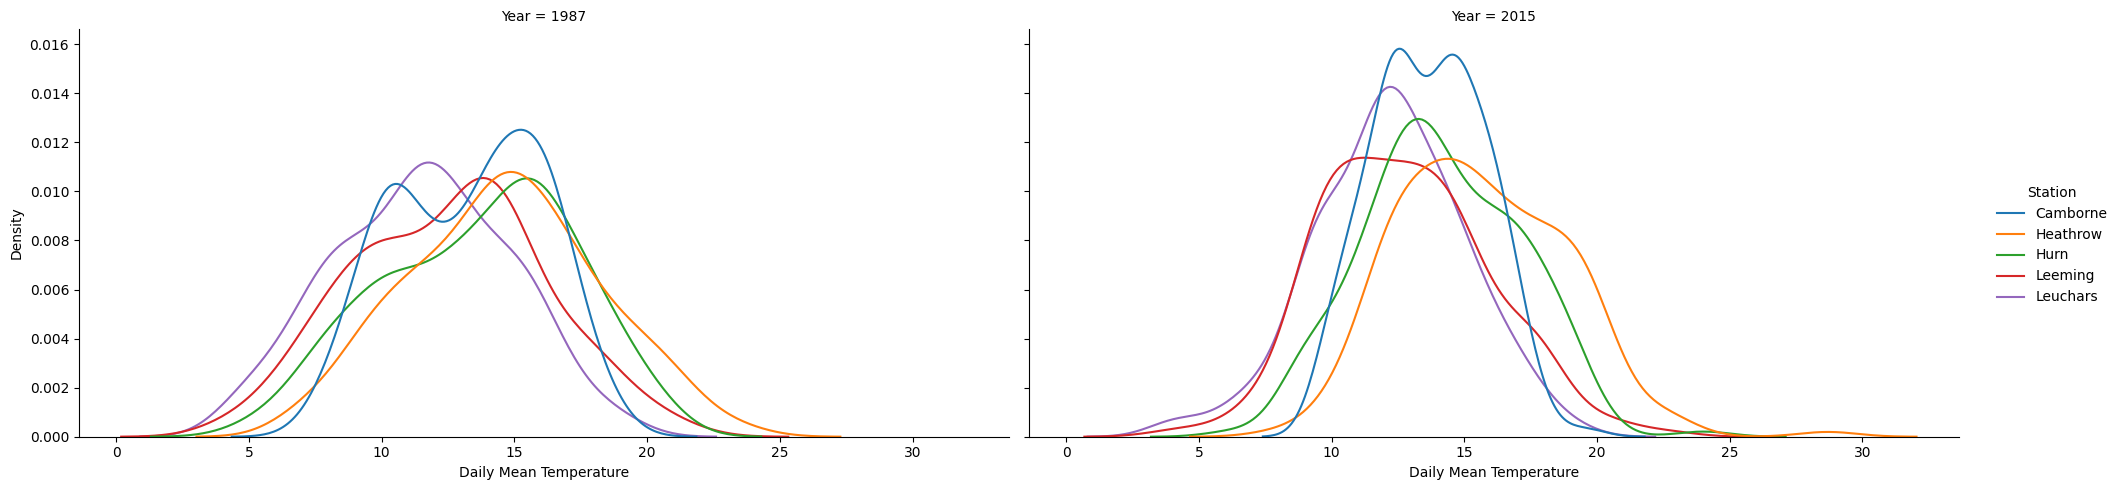

In [16]:
# kind='kde' estimates the shape of a continuous distribution, categorised using hue and col
sns.displot(data=weather_data, kind='kde', x='Daily Mean Temperature', hue='Station', col='Year', aspect=2);

> * In the box below copy and change the code to create kdes for another numerical feature categorised by station and year 
> * Explore changing the order of `col` and `hue`: e.g. `hue='Year', col='Station'`

In [17]:
# kind='kde' estimates the shape of a continuous distribution, categorised using hue and col

## Checkpoint 3

> * Give at least one difference between the weather for the different stations/years that can be observed from the histograms or KDEs.
> * Explain how histograms or KDEs are useful when comparing different categories within a data set. For example you could suggest an aspect of the data that is easier to see using a histogram than a box plot. 

<a id='communicating'></a>
# Communicating the results
## Checkpoint 4
 
> * Use the statistics and charts produced to answer the initial problem: ***How does the weather differ at the five different UK stations?***
> * How do these statistics relate to the geographical locations of the weather stations? The image below shows the locations on a map.

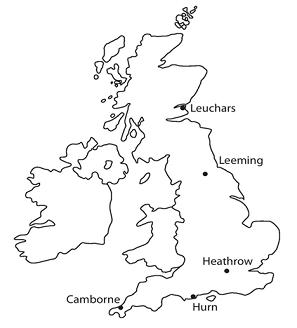